In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import time
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data_dir = "./Kannada-MNIST/"
train = pd.read_csv(data_dir + "train.csv")
train.shape

(60000, 785)

In [31]:
data_dir = "./Kannada-MNIST/"
test = pd.read_csv(data_dir + "test.csv")
test.shape

(5000, 785)

In [32]:
X_train = train.values[:,1:]
y_train = train.values[:,0]
X_test = test.values[:,1:]
y_test = test.values[:,0]

In [17]:
train.iloc[:,0].unique() #check the unique labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


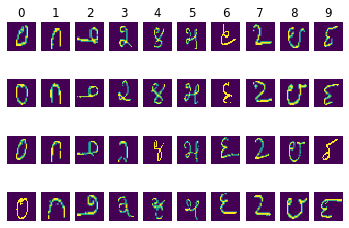

In [18]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
rows = 4

print(classes)
for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in y_train])
    idxs = np.random.choice(idxs[0], rows)
    for i , idx in enumerate(idxs):
        plt_idx = i * len(classes) + y + 1
        plt.subplot(rows, len(classes), plt_idx)
        plt.imshow(X_train[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)   

plt.show()

# show some pictures

In [21]:
X_train,X_vali, y_train, y_vali = train_test_split(X_train,
                                                   y_train,
                                                   test_size = 0.2)

print(X_train.shape, X_vali.shape, y_train.shape, y_vali.shape)

(48000, 784) (12000, 784) (48000,) (12000,)


In [23]:
ans_k = 0

k_range = range(1, 10)
scores = []

for k in k_range:
    print("k = " + str(k) + " begin ")
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_vali)
    accuracy = accuracy_score(y_vali,y_pred)
    scores.append(accuracy)
    end = time.time()
    print(classification_report(y_vali, y_pred))  
    print(confusion_matrix(y_vali, y_pred))  
    
    print("Complete time: " + str(end-start) + " Secs.")

k = 1 begin 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1164
           1       0.97      0.99      0.98      1183
           2       1.00      1.00      1.00      1195
           3       0.99      0.98      0.98      1141
           4       0.99      0.99      0.99      1213
           5       1.00      0.99      0.99      1227
           6       0.97      0.97      0.97      1221
           7       0.95      0.97      0.96      1172
           8       1.00      0.98      0.99      1240
           9       0.99      0.98      0.98      1244

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

[[1135   24    0    1    0    0    0    0    2    2]
 [   7 1176    0    0    0    0    0    0    0    0]
 [   2    0 1190    1    0    0    1    1    0    0]
 [   7    0    1 1116    3    1    1   12    0    0]
 [   0    1    0

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1164
           1       0.97      1.00      0.98      1183
           2       1.00      0.99      1.00      1195
           3       0.98      0.98      0.98      1141
           4       0.98      1.00      0.99      1213
           5       1.00      0.98      0.99      1227
           6       0.96      0.98      0.97      1221
           7       0.96      0.96      0.96      1172
           8       1.00      0.97      0.99      1240
           9       0.99      0.97      0.98      1244

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

[[1131   30    0    2    0    0    0    0    1    0]
 [   5 1178    0    0    0    0    0    0    0    0]
 [   3    0 1189    1    0    0    1    1    0    0]
 [   7    1    1 1119    4    1    0    8    0    0]
 [   0    1    0    2 1207   

[0.9823333333333333, 0.9798333333333333, 0.9830833333333333, 0.9813333333333333, 0.9815833333333334, 0.9803333333333333, 0.9809166666666667, 0.9804166666666667, 0.9796666666666667]


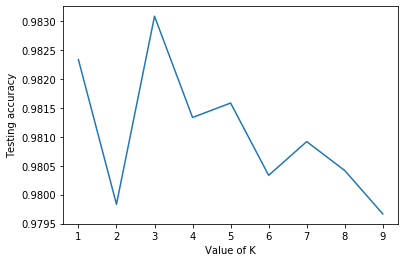

In [24]:
print (scores)
plt.plot(k_range,scores)
plt.xlabel('Value of K')
plt.ylabel('Testing accuracy')
plt.show()

In [26]:
k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

In [34]:
y_pred = knn.predict(X_test)

In [46]:
index = np.array(test.index)

In [54]:
res = pd.DataFrame(np.concatenate([index[:,np.newaxis], y_pred[:,np.newaxis]], axis = 1), columns = ['id', 'label'])

In [55]:
res.to_csv('res.csv', index = False)